## Get a list of paths with respect to bone age X-ray images

In [8]:
from glob import glob
from scipy import misc
from skimage import exposure, io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

paths = glob('./boneage-training-dataset/*.png')
total_set = len(paths)
num_testing_set = int(total_set/5)
num_training_set = total_set - num_testing_set
print(total_set, num_testing_set, num_training_set)

6000 1200 4800


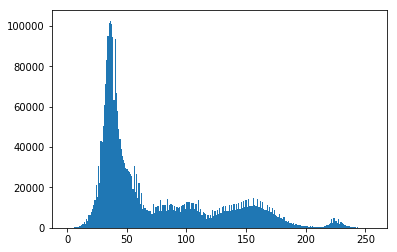

/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


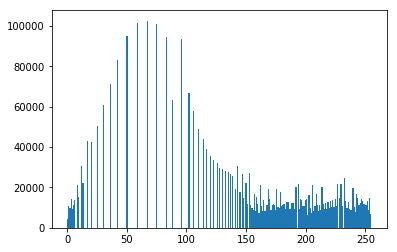

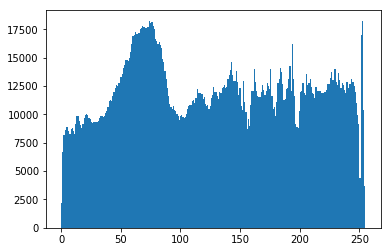

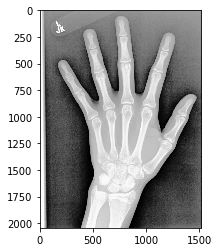

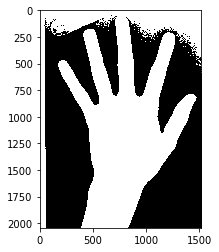

130.0


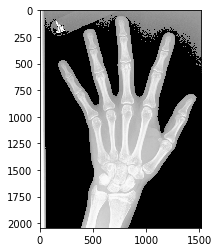

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


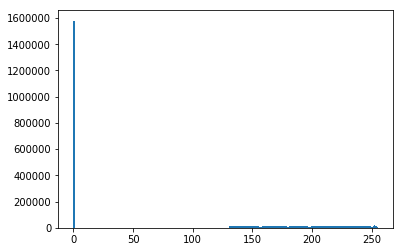

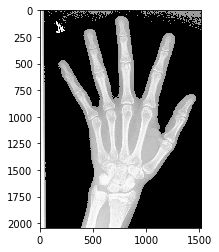

In [111]:
img = misc.imread(paths[0])
plt.hist(img.ravel(), bins=256)
plt.show()
#img[img >= 200] = 0
img_eq = img_as_ubyte(exposure.equalize_hist(img))
plt.hist(img_eq.ravel(), bins=256)
plt.show()

blur = cv2.GaussianBlur(img_eq,(5,5),0)
plt.hist(blur.ravel(), bins=256)
plt.show()
plt.imshow(blur, cmap='gray', clim=(0, 255)) #clim is only thresholding
plt.show()

#img_eq = img_as_ubyte(exposure.equalize_hist(blur))
#plt.hist(img_eq.ravel(), bins=256)
#plt.show()

ret,thresh = cv2.threshold(blur, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()
print(ret)
otsu = np.multiply(blur, thresh)
plt.imshow(otsu, cmap='gray')
plt.show()
print(thresh)
plt.hist(otsu.ravel(), bins=256)
plt.show()


img_eq[img_eq <= ret + 20] = 0
plt.imshow(img_eq, cmap='gray')
plt.show()

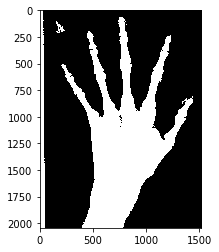

94.0


In [42]:
#img2 = cv2.imread(paths[0], 0) # 0 means load in grayscale
#ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#plt.imshow(thresh, cmap='gray')
#plt.show()
#print(ret)
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,33,9)
#plt.imshow(th3, cmap='gray')
#plt.show()

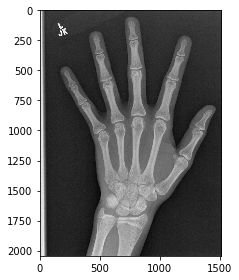

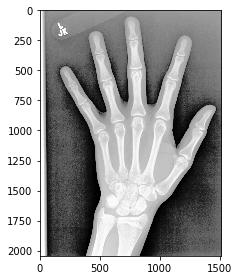

[[238 238 239 ...,   0   0   0]
 [238 238 239 ...,   0   0   0]
 [238 238 239 ...,   0   0   0]
 ..., 
 [229 228 227 ...,   0   0   0]
 [230 230 229 ...,   0   0   0]
 [230 230 230 ...,   0   0   0]]


In [55]:
#img = misc.imread(paths[0])
# Equalization
#img_eq = exposure.equalize_hist(blur)

#img_eq2 = exposure.equalize_hist(img_eq)

#Display Image
#io.imshow(img,cmap=plt.cm.gray)
#io.show()
#io.imshow(img_eq,cmap=plt.cm.gray)
#io.show()
#print(otsu)

/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


[[255 254 255 ..., 161 163 163]
 [255 255 255 ..., 163 163 157]
 [255 255 255 ..., 160 162 159]
 ..., 
 [254 254 254 ..., 114 110 126]
 [255 254 254 ..., 123 126 126]
 [254 253 255 ..., 128 130 135]]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]


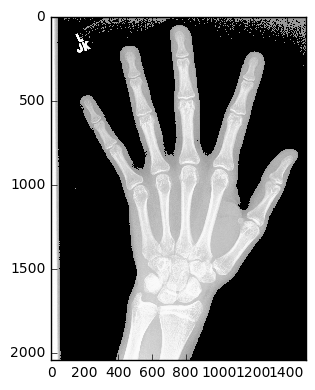

In [58]:
#img = misc.imread(paths[0])
#img_eq = img_as_ubyte(exposure.equalize_hist(img))
#thresh = 150
#print(img_eq)
#idx = img_eq[:, :] <= thresh
#print(idx)
#img_eq[idx] = 0
#io.imshow(img_eq, cmap=plt.cm.gray)
#io.show()

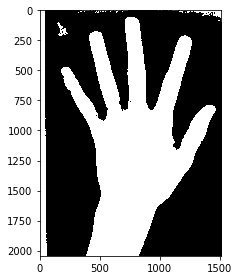

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]]


In [121]:
from skimage.morphology import binary_opening, binary_closing, square
img_opening = binary_opening(img_eq, square(5))
io.imshow(img_opening, cmap=plt.cm.gray)
io.show()
print(img_opening)

[[ 1  1  1 ..., 27 27 27]
 [ 1  1  1 ..., 27 27 27]
 [ 1  1  1 ..., 27 27 27]
 ..., 
 [ 1  1  1 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]] 63
[1865826   95034     635     183      92     252     306     214     108
      25      50     115      36      85      46     407      86     334
      41      25      70      55      56      71      50     154     226
    9684      30      80      30      25      55      30      30      25
      59      25      49      85      35      57      47      43      25
      25      25      30      30      49      76      30      45      40
      49      69 1114786      45      35      25      73    2952      30
    1206]
95034


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


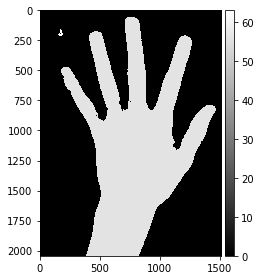

In [125]:
from scipy.ndimage import label
labeled_img, nlabels = label(img_opening)
print(labeled_img, nlabels)
cluster_size = np.bincount(labeled_img.ravel())
print(cluster_size)
fourth_large = sorted(cluster_size)[-3]
print(fourth_large)
for i in range(1, nlabels):
    coord = np.where(labeled_img == i)
    if cluster_size[i] <= fourth_large:
        labeled_img[coord] = 0
io.imshow(labeled_img, cmap=plt.cm.gray)
io.show()

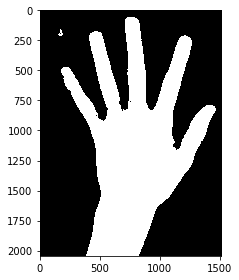

In [127]:
new = np.zeros(labeled_img.shape)
new[labeled_img >= 1] = 1

io.imshow(new, cmap=plt.cm.gray)
io.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


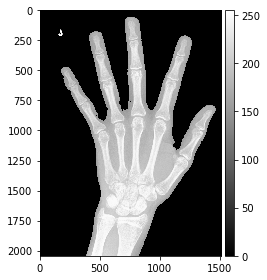

In [128]:
labeled_img[labeled_img >= 1] = 1
img_after_label = img_eq * labeled_img
print(labeled_img)
print(img_after_label)

io.imshow(img_after_label, cmap=plt.cm.gray)
io.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


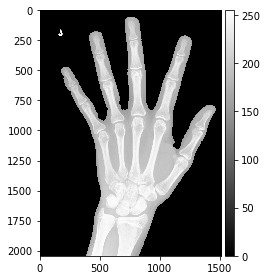

In [130]:
from skimage.morphology import closing
img_closing = closing(img_after_label, square(5))
print(img_closing)
io.imshow(img_closing, cmap=plt.cm.gray)
io.show()

[[  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   7.61354977e-08
    7.61354976e-08   7.61354976e-08]
 [  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   7.60859407e-08
    7.60859276e-08   7.60859276e-08]
 [  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   7.57197487e-08
    7.57196521e-08   7.57196521e-08]
 ..., 
 [  1.18555201e-07   1.18516210e-07   1.18510934e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18887679e-07   1.18599577e-07   1.18560574e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18971046e-07   1.18932056e-07   1.18926669e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


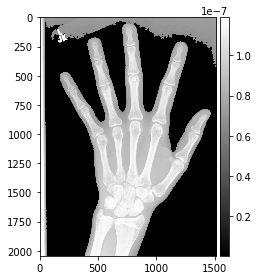

In [79]:
#from skimage.filters import gaussian
#img_smooth = gaussian(img_closing, sigma=0.5)
#print(img_smooth)
#io.imshow(img_smooth, cmap=plt.cm.gray)
#io.show()

In [153]:
from PIL import Image
im = Image.fromarray(img_closing)
print(np.max(img_closing))
print(im)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("first_test.png")

255
<PIL.Image.Image image mode=I size=1514x2044 at 0x1119E2198>
